<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Return_and_Risk_of_a_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
#Calculating the Return of a Portfolio of Securities
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
# Define the ticker list
import pandas as pd
tickers_list = ['BP', 'AMZN', 'XOM', 'MSFT', 'AAPL']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%%**********************]  5 of 5 completed
                 AAPL     AMZN         BP       MSFT        XOM
Date                                                           
2015-01-02  24.466448  15.4260  22.330912  40.452740  62.090664
2015-01-05  23.777193  15.1095  21.147587  40.080746  60.391750
2015-01-06  23.779427  14.7645  20.989422  39.492470  60.070702
2015-01-07  24.112865  14.9210  21.042143  39.994225  60.679359
2015-01-08  25.039343  15.0230  21.516647  41.170776  61.689346


In [ ]:
print(data.tail())

                  AAPL        AMZN         BP        MSFT         XOM
Date                                                                 
2023-12-05  193.419998  146.880005  35.290001  372.519989  100.440002
2023-12-06  192.320007  144.520004  34.849998  368.799988   99.110001
2023-12-07  194.270004  146.880005  34.689999  370.950012   98.419998
2023-12-08  195.710007  147.419998  35.299999  374.230011   99.550003
2023-12-11  192.069397  144.160004  35.310001  368.660004   99.205002


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2251 entries, 2015-01-02 to 2023-12-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2251 non-null   float64
 1   AMZN    2251 non-null   float64
 2   BP      2251 non-null   float64
 3   MSFT    2251 non-null   float64
 4   XOM     2251 non-null   float64
dtypes: float64(5)
memory usage: 105.5 KB


In [ ]:
#Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method).
data.iloc[0]

AAPL    24.466448
AMZN    15.426000
BP      22.330912
MSFT    40.452740
XOM     62.090664
Name: 2015-01-02 00:00:00, dtype: float64

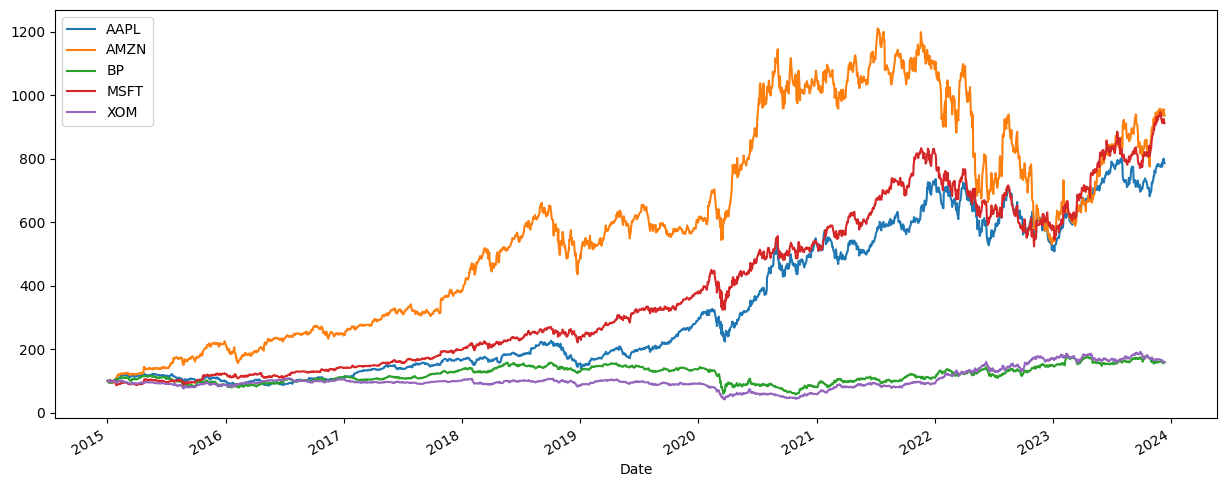

In [ ]:
(data / data.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [ ]:
#Calculating the Return of a Portfolio of Securities
returns = (data / data.shift(1)) - 1
returns.head()

,AAPL,AMZN,BP,MSFT,XOM
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028171,-0.020517,-0.052990,-0.009196,-0.027362
2015-01-06,0.000094,-0.022833,-0.007479,-0.014677,-0.005316
2015-01-07,0.014022,0.010600,0.002512,0.012705,0.010132
2015-01-08,0.038423,0.006836,0.022550,0.029418,0.016645


In [ ]:
#First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [ ]:
#Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.
annual_returns = returns.mean() * 250
annual_returns

AAPL    0.271103
AMZN    0.303266
BP      0.103212
MSFT    0.284186
XOM     0.092714
dtype: float64

In [ ]:
np.dot(annual_returns, weights)*100

21.089598074192708

In [ ]:
#Transform the result into a percentage form.
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

21.09 %


In [ ]:
#Calculating Portfolio Risk
import pandas as pd
tickers_list = ['MSFT', 'AAPL']

# Fetch the data
import yfinance as yf
sec_data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%%**********************]  2 of 2 completed
                 AAPL       MSFT
Date                            
2015-01-02  24.466448  40.452728
2015-01-05  23.777195  40.080738
2015-01-06  23.779428  39.492466
2015-01-07  24.112871  39.994236
2015-01-08  25.039343  41.170788


In [ ]:
print(data.tail(10))

                  AAPL        MSFT
Date                              
2023-11-28  190.399994  382.700012
2023-11-29  189.369995  378.850006
2023-11-30  189.949997  378.910004
2023-12-01  191.240005  374.510010
2023-12-04  189.429993  369.140015
2023-12-05  193.419998  372.519989
2023-12-06  192.320007  368.799988
2023-12-07  194.270004  370.950012
2023-12-08  195.710007  374.230011
2023-12-11  192.339996  370.089996


In [ ]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns

,AAPL,MSFT
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.028576,-0.009239
2015-01-06,0.000094,-0.014786
2015-01-07,0.013925,0.012626
2015-01-08,0.037703,0.028993
...,...,...
2023-12-05,0.020844,0.009115
2023-12-06,-0.005703,-0.010036
2023-12-07,0.010088,0.005813


In [ ]:
#MSFT
sec_returns['MSFT'].mean()

0.00098407358004339

In [ ]:
sec_returns['MSFT'].mean() * 250

0.24601839501084752

In [ ]:
sec_returns['MSFT'].std()

0.01755759704066876

In [ ]:
sec_returns['MSFT'].std() * 250 ** 0.5

0.27760998443972634

In [ ]:
#APPLE

In [ ]:
sec_returns['AAPL'].mean()

0.0009165890103104061

In [ ]:
sec_returns['AAPL'].mean() * 250

0.22914725257760152

In [ ]:
sec_returns['AAPL'].std()

0.01834606798192744

In [ ]:
sec_returns['AAPL'].std() * 250 ** 0.5

0.29007680465589764

In [ ]:
sec_returns[['MSFT', 'AAPL']].mean() * 250

MSFT    0.246018
AAPL    0.229147
dtype: float64

In [ ]:
sec_returns[['MSFT', 'AAPL']].std() * 250 ** 0.5

MSFT    0.277610
AAPL    0.290077
dtype: float64

In [ ]:
cov_matrix = sec_returns.cov()
cov_matrix

,AAPL,MSFT
AAPL,0.000337,0.000225
MSFT,0.000225,0.000308


In [ ]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,AAPL,MSFT
AAPL,0.084145,0.056291
MSFT,0.056291,0.077067


In [ ]:
corr_matrix = sec_returns.corr()
corr_matrix

,AAPL,MSFT
AAPL,1.000000,0.699025
MSFT,0.699025,1.000000


In [ ]:
#Calculating Portfolio Risk
weights = np.array([0.5, 0.5])

In [ ]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.06844859820974389

In [ ]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.2616268300647774

In [ ]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

26.162999999999997 %
